In [291]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sns
import markdown
import sys
import os
import itertools
import scipy as sc
import emcee
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator



In [168]:
path = '/Users/vs/Dropbox/Notes_on_papers/hogg_bovy_lang_2010'

#path = '/Users/vs/Dropbox/Gaia/'
os.chdir(path)



In [169]:
#df = pd.read_csv('test_output', sep=',', header=0, names=('x', 'y', 'sigma_y'))
df = pd.read_csv('table1.txt', delim_whitespace=True, header=0, names=('ID', 'x', 'y', 'sigma_y', 'sigma_x', 'rho_xy'))

In [170]:
df

,ID,x,y,sigma_y,sigma_x,rho_xy
0,1,201,592,61,9,-0.84
1,2,244,401,25,4,0.31
2,3,47,583,38,11,0.64
3,4,287,402,15,7,-0.27
4,5,203,495,21,5,-0.33
5,6,58,173,15,9,0.67
6,7,210,479,27,4,-0.02
7,8,202,504,14,4,-0.05
8,9,198,510,30,11,-0.84
9,10,158,416,16,7,-0.69


In [5]:
y = df.y[4:].values
x = df.x[4:].values
sig_y = df.sigma_y[4:].values


In [6]:
x,y,sig_y

(array([203,  58, 210, 202, 198, 158, 165, 201, 157, 131, 166, 160, 186,
        125, 218, 146]),
 array([495, 173, 479, 504, 510, 416, 393, 442, 317, 311, 400, 337, 423,
        334, 533, 344]),
 array([21, 15, 27, 14, 30, 16, 14, 25, 52, 16, 34, 31, 42, 26, 16, 22]))

In [7]:
A = np.vstack((np.ones(len(x)), x)).T
A.shape

(16, 2)

In [8]:
C = np.diag(sig_y*sig_y)

In [9]:
## this is the first matrix in equation 5

cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))

In [10]:
### substituted into the whole of equation 5

b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

In [11]:
b_ls, m_ls

(34.047727757544635, 2.239920831631089)

In [12]:
### errors are the diagonals on the covariance matrix
## [0][0] corresponds to b, [1][1] corresponds to m

cov

array([[  3.32922601e+02,  -1.88954491e+00],
       [ -1.88954491e+00,   1.16166311e-02]])

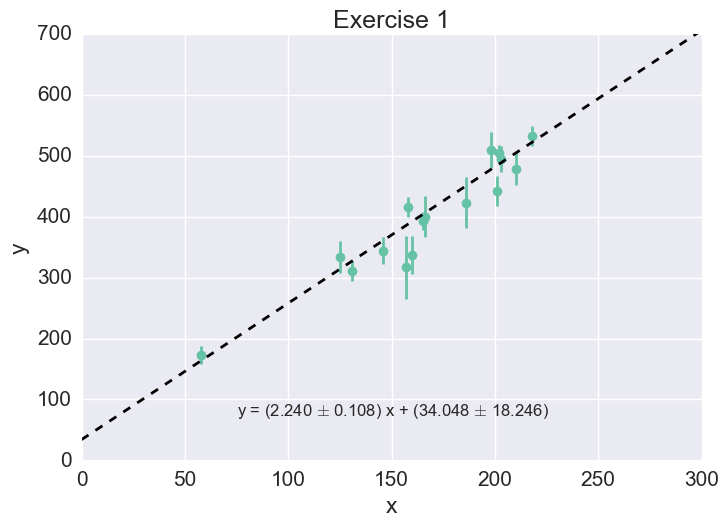

In [13]:
sns.set(style="darkgrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.0})
sns.set_palette("Set2", 1)

palette = itertools.cycle(sns.color_palette())
col=next(palette)

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 1')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

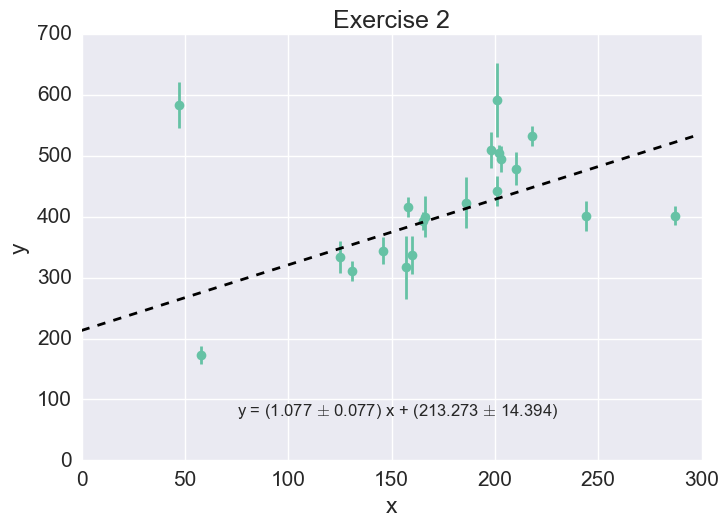

In [14]:
y = df.y.values
x = df.x.values
sig_y = df.sigma_y.values
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)
cov = np.linalg.inv(np.dot(A.T, np.linalg.solve(C, A)))
b_ls, m_ls = np.dot(cov, np.dot(A.T, np.linalg.solve(C, y)))

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 2')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

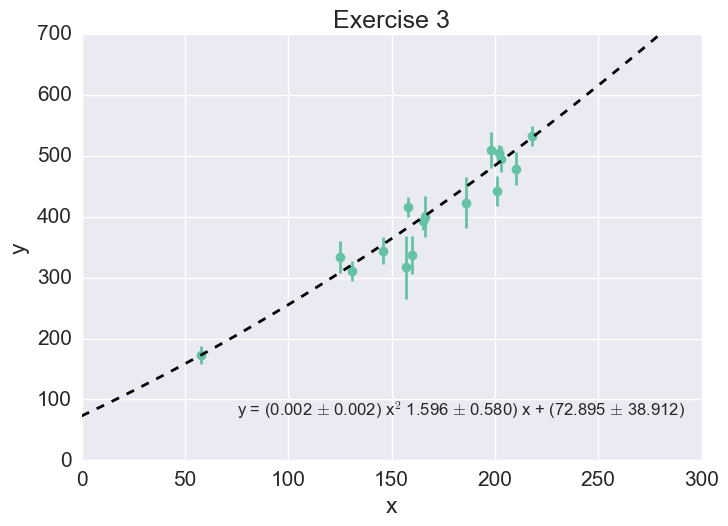

In [15]:
y = df.y[4:].values
x = df.x[4:].values
sig_y = df.sigma_y[4:].values
#A = np.vstack((np.ones(len(x)), x )).T
Q = np.vstack((np.ones(len(x)), x, x**2)).T

C = np.diag(sig_y*sig_y)
cov = np.linalg.inv(np.dot(Q.T, np.linalg.solve(C, Q)))
b_ls, m_ls, q_ls = np.dot(cov, np.dot(Q.T, np.linalg.solve(C, y)))

xfit = np.arange(0, 300, 1)

mp.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
mp.plot(xfit, b_ls + m_ls*xfit + q_ls*xfit**2, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Exercise 3')

plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x$^2$ {2:.3f} $\pm$ {3:.3f}) x + ({4:.3f} $\pm$ {5:.3f})'.format(q_ls, np.sqrt(cov[2][2]), m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

## Exercise 4

$$ \ln \mathscr{L} = K - \displaystyle\sum_{i=1}^{N} \frac{\left[ t_{i} - T \right]}{2 \sigma_{ti}^{2}} $$

## Exercise 5

Come back to this

In [98]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)


In [99]:
def single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad):   
    return np.array(((1 - Pbad) / np.sqrt(2.*np.pi*yvar) * np.exp(-0.5 * (y - m*x - b)**2 / yvar) +
            Pbad / np.sqrt(2.*np.pi * Vbad) * np.exp(-0.5 * (y - Ybad)**2 / Vbad)))

def likelihood(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.prod(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

    
    
def prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    return np.array((Pbad >= 0) * (Pbad < 1) * (Vbad > 0))

def posterior(params, x, y, yerr):
    post = likelihood(params, x, y, yerr) * prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post


In [118]:
### Tried doing this with emcee but I still don't understand it

def pick_new_parameters(nsteps, params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    mscale = 0.05
    bscale = 1.
    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    newm = m + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [119]:
np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([b, m, Pbad, Ybad, Vbad])

In [120]:
p = posterior(params, x, y, sig_y)
print 'starting p = ', p

starting p =  1.95946309776e-55


In [121]:
chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

In [125]:
### Here is where I do the MCMC



Doing  10000 steps of MCMC...
1.95946309776e-55
[  2.13273492e+02   1.07674752e+00   5.00000000e-01   4.19450000e+02
   9.95304750e+03]
[  2.12553406e+02   1.09002310e+00   5.00000000e-01   4.19450000e+02
   9.95304750e+03]
5.74598580072e-55


In [126]:
print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters(nsteps, oldparams)
    p = posterior(newparams, x, y, sig_y)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

Doing  10000 steps of MCMC...
1 1 1.0 9.05938178197e-55 9.05938178197e-55 [  2.13706518e+02   1.13689939e+00   5.00000000e-01   4.19450000e+02
   9.95304750e+03]
5001 1712 0.342331533693 1.38464530671e-52 1.40377171446e-52 [  1.56359276e+02   1.43508465e+00   5.00000000e-01   4.19450000e+02
   9.95304750e+03]
acceptance fraction 0.3407


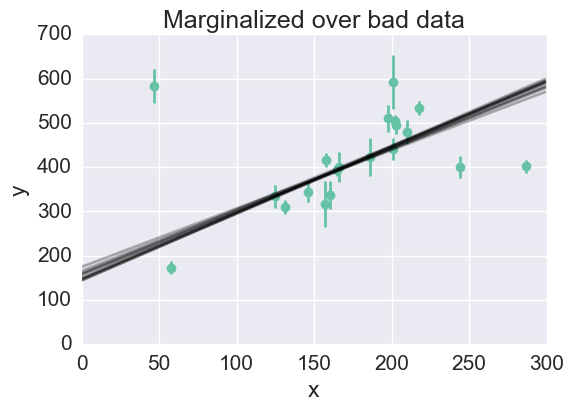

In [142]:
xfit = np.arange(0, 300, 1)

ax1 = mp.subplot(111)

ax1.errorbar(x, y, yerr=sig_y, fmt='o', color=col)
#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(0, 300)
mp.ylim(0, 700)
mp.xlabel('x')
mp.ylabel('y')
mp.title('Marginalized over bad data')

#plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
#mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 10 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:10]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.3)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

for(p, params) in chain[Nchain/2:]:
    (b, m, Pbad, Ybad, Vbad) = params
    #print params
    params_bgp = params
    params_fgp = params
    params_bgp[2] = 1.0
    params_fgp[2] = 0.0
    bgp += Pbad * single_point_likelihoods(x, y, sig_y, *params_bgp)
    fgp += (1.0-Pbad) * single_point_likelihoods(x, y, sig_y, *params_fgp)
    bgodds = bgp / fgp
    
    for i, bgo in enumerate(bgodds):
        if bgo < 1:
            continue
        dxl = (xmax - xmin) * 0.01
        dy1 = (ymax - ymin) * 0.01

max H: 33.0


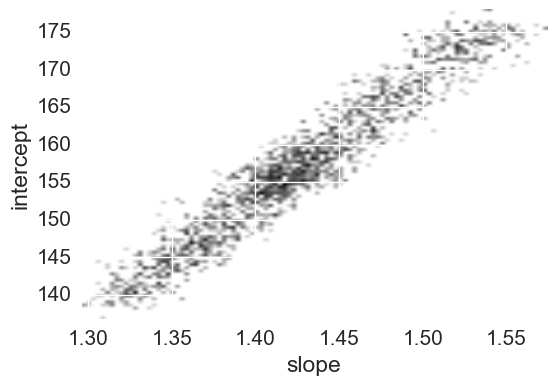

In [159]:
ax2 = mp.subplot(111)

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])

Pbads = np.array([Pbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Ybads = np.array([Ybad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Vbads = np.array([Vbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


antigray = LinearSegmentedColormap('antigray', {'red':   ((0., 1, 1), (1., 0, 0)), 'green': ((0., 1, 1), (1., 0, 0)), 'blue':  ((0., 1, 1), (1., 0, 0))})

(H, xe, ye) = np.histogram2d(ms, bs, bins=(100, 100))
print 'max H:', H.max()

ax2.imshow(np.log(1 + H.T), extent=(xe.min(), xe.max(), ye.min(), ye.max()), aspect='auto', cmap=antigray)
mp.xlabel('slope')
mp.ylabel('intercept')

In [148]:
I = Nchain / 2 + np.random.permutation(Nchain/2)[:100]


In [160]:
print np.mean(ms), np.mean(bs), np.mean(Pbads), np.mean(Ybads), np.mean(Vbads)

1.4241797138 158.093451446 0.0 419.45 9953.0475


(array([    0.,     0.,     0.,     0.,     0.,  5000.,     0.,     0.,
            0.,     0.]),
 array([ 9952.5475,  9952.6475,  9952.7475,  9952.8475,  9952.9475,
         9953.0475,  9953.1475,  9953.2475,  9953.3475,  9953.4475,
         9953.5475]),
 <a list of 10 Patch objects>)

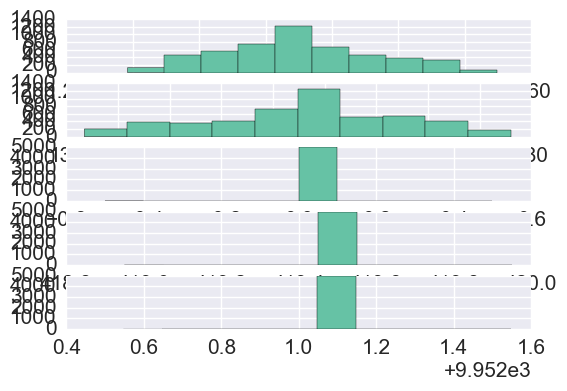

In [161]:
fig, ax = mp.subplots(5)
ax[0].hist(ms)
ax[1].hist(bs)
ax[2].hist(Pbads)
ax[3].hist(Ybads)
ax[4].hist(Vbads)

In [177]:
path = '/Users/vs/Dropbox/Gaia/'
os.chdir(path)

df = pd.read_csv('test_output', sep=',', header=0, names=('x', 'y', 'sigma_y'))



In [313]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)



In [314]:
print bestfit

[-0.9183302  -1.50506326]


In [315]:
def single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad):   
    return np.array(((1 - Pbad) / np.sqrt(2.*np.pi*yvar) * np.exp(-0.5 * (y - m*x - b)**2 / yvar) +
            Pbad / np.sqrt(2.*np.pi * Vbad) * np.exp(-0.5 * (y - Ybad)**2 / Vbad)))

def likelihood(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.prod(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

    
    
def prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    return np.array((Pbad >= 0) * (Pbad < 1) * (Vbad > 0))

def posterior(params, x, y, yerr):
    post = likelihood(params, x, y, yerr) * prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post

def ln_like(params, x, y, yvar):
    b = params[0]
    m = params[1]
    Pbad = params[2] ## prior probability a point is bad
    Ybad = params[3] ## Mean of bad points
    Vbad = params[4] ## Variance of bad points
    
    return np.array(np.sum(single_point_likelihoods(x, y, yvar, m, b, Pbad, Ybad, Vbad)))

def ln_prior(params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    if (Pbad >= 0) and (Pbad < 1) and (Vbad > 0) and m > -10 and m < 10 and b < 10000 and b > -10000:
        return 0
    return -np.inf

def ln_posterior(params, x, y, yerr):
    post = ln_like(params, x, y, yerr) + ln_prior(params)
    if not np.isfinite(post):
        return -np.inf
    return post


In [316]:
### Tried doing this with emcee but I still don't understand it

def pick_new_parameters(nsteps, params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    mscale = 0.106 ## from m4 paper
    bscale = 1.
    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    #newm = m + mscale * np.random.normal()
    ## fixing the slope to M4 value
    newm = -2.332 + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [317]:
np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], -2.332, Pbad, Ybad, Vbad])

In [318]:
p = posterior(params, x, y, sig_y)
print 'starting p = ', p

starting p =  4.06582673341e-18


In [319]:
chain = []
oldp = p
oldparams = params
bestparams = oldparams
bestp = oldp
nsteps = 0
naccepts = 0
NSTEPS = 10000

In [320]:
print 'Doing ', NSTEPS, 'steps of MCMC...'
while nsteps < NSTEPS:
    newparams = pick_new_parameters_freeslope(nsteps, oldparams)
    p = posterior(newparams, x, y, sig_y)
    if p/oldp > np.random.uniform():
        chain.append((p, newparams))
        oldparams = newparams
        oldp = p
        if p > bestp:
            bestp = p
            bestparams = newparams
        naccepts += 1
    else:
        chain.append((oldp, oldparams))
    nsteps += 1
    if (nsteps % 5000 == 1):
        print nsteps, naccepts, (naccepts/float(nsteps)), oldp, bestp, bestparams
print 'acceptance fraction', (naccepts/float(nsteps))        

Doing  10000 steps of MCMC...
1 0 0.0 4.06582673341e-18 4.06582673341e-18 [-0.9183302  -2.332       0.5        -0.76025318  0.5481331 ]
5001 3618 0.723455308938 5.58611346638e-17 8.63482262588e-17 [-1.02725941 -2.0762597   0.5        -0.76025318  0.5481331 ]
acceptance fraction 0.7204


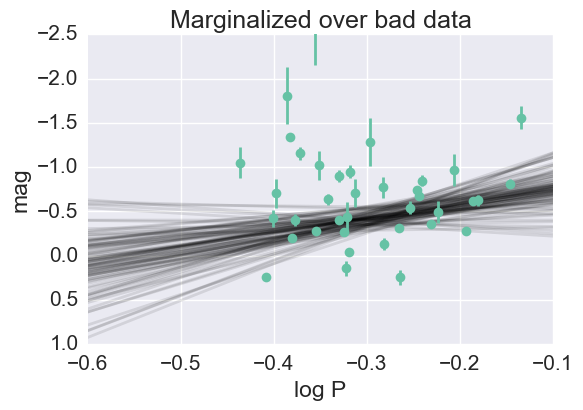

In [326]:
xfit = np.arange(-1, 1, 0.1)

ax1 = mp.subplot(111)

ax1.errorbar(x, y, yerr=sig_y, fmt='o', color=col, zorder=4)
#ax1.plot(xfit, b_ls + m_ls*xfit, 'k--')
mp.xlim(-0.6, -0.1)
mp.ylim(1, -2.5)
mp.xlabel('log P')
mp.ylabel('mag')
mp.title('Marginalized over bad data')

#plot_text = 'y = ({0:.3f} $\pm$ {1:.3f}) x + ({2:.3f} $\pm$ {3:.3f})'.format(m_ls, np.sqrt(cov[1][1]), b_ls, np.sqrt(cov[0][0]))
#mp.annotate(plot_text, xy=(75, 75), xycoords='data', size=12)

xmin, xmax = mp.xlim()
ymin, ymax = mp.ylim()

## Picking 10 chains at random to plot
Nchain = len(chain)
I = Nchain / 2 + np.random.permutation(Nchain/2)[:100]
for i in I:
    (p, params) = chain[i]
    (b, m, Pbad, Ybad, Vbad) = params
    ys = m*xfit + b
    ax1.plot(xfit, ys, color='k', alpha=0.1)
### Using a mixture model of 'bad data' and 'good data'
bgp = np.zeros(len(x))
fgp = np.zeros(len(x))

for(p, params) in chain[Nchain/2:]:
    (b, m, Pbad, Ybad, Vbad) = params
    #print params
    params_bgp = params
    params_fgp = params
    params_bgp[2] = 1.0
    params_fgp[2] = 0.0
    bgp += Pbad * single_point_likelihoods(x, y, sig_y, *params_bgp)
    fgp += (1.0-Pbad) * single_point_likelihoods(x, y, sig_y, *params_fgp)
    bgodds = bgp / fgp
    
    for i, bgo in enumerate(bgodds):
        if bgo < 1:
            continue
        dxl = (xmax - xmin) * 0.01
        dy1 = (ymax - ymin) * 0.01

max H: 32.0


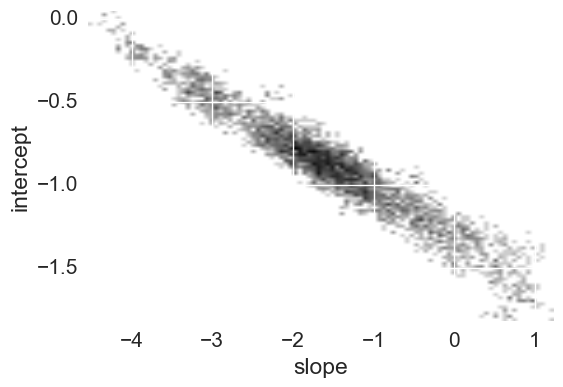

In [322]:
ax2 = mp.subplot(111)

ms = np.array([m for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
bs = np.array([b for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])

Pbads = np.array([Pbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Ybads = np.array([Ybad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])
Vbads = np.array([Vbad for (p, (b, m, Pbad, Ybad, Vbad)) in chain[Nchain/2:]])


antigray = LinearSegmentedColormap('antigray', {'red':   ((0., 1, 1), (1., 0, 0)), 'green': ((0., 1, 1), (1., 0, 0)), 'blue':  ((0., 1, 1), (1., 0, 0))})

(H, xe, ye) = np.histogram2d(ms, bs, bins=(100, 100))
print 'max H:', H.max()

ax2.imshow(np.log(1 + H.T), extent=(xe.min(), xe.max(), ye.min(), ye.max()), aspect='auto', cmap=antigray)
mp.xlabel('slope')
mp.ylabel('intercept')

In [323]:
print np.mean(ms), np.mean(bs), np.mean(Pbads), np.mean(Ybads), np.mean(Vbads)
print np.std(ms), np.std(bs), np.std(Pbads), np.std(Ybads), np.std(Vbads)

-1.54406703203 -0.884776054711 0.0 -0.760253181829 0.54813310041
1.02088888239 0.297606112139 0.0 1.11022302463e-16 1.11022302463e-16


In [324]:
### Tried doing this with emcee but I still don't understand it

def pick_new_parameters_freeslope(nsteps, params):
    b = params[0]
    m = params[1]
    Pb = params[2] ## prior probability a point is bad
    Yb = params[3] ## Mean of bad points
    Vb = params[4] ## Variance of bad points

    mscale = 0.106 ## from m4 paper
    bscale = 0.069 ### median uncertaintiy on y
    # burn-in slope and intercept
    if nsteps > 10000:
        pbadscale = 0.1
        ybadscale = bscale
        vbadscale = 10.
    else:
        pbadscale = 0
        ybadscale = 0
        vbadscale = 0
    newb = b + bscale * np.random.normal()
    #newm = m + mscale * np.random.normal()
    ## fixing the slope to M4 value
    newm = m + mscale * np.random.normal()
    newPbad = Pbad + pbadscale * np.random.normal()
    newYbad = Ybad + ybadscale * np.random.normal()
    newVbad = Vbad + vbadscale * np.random.normal()
    newparams = np.array([newb, newm, newPbad, newYbad, newVbad])
    return (newparams)


In [205]:
np.mean(sig_y)

0.11175570161279741

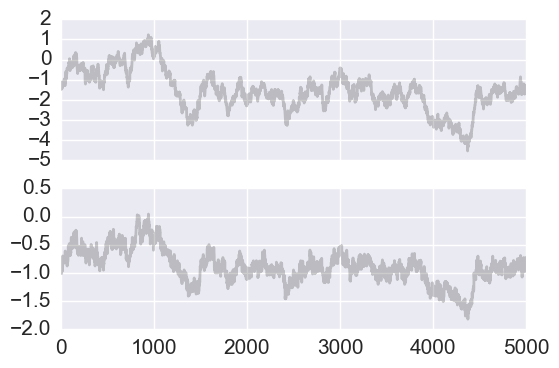

In [270]:
fig, ax = mp.subplots(2, sharex=True)
ax[0].plot(ms, '-k', alpha=0.2)
ax[1].plot(bs, '-k', alpha=0.2)

(array([   64.,   135.,   407.,   404.,  1286.,  1382.,   541.,   409.,
          247.,   125.]),
 array([-4.53977808, -3.96299822, -3.38621836, -2.8094385 , -2.23265864,
        -1.65587878, -1.07909892, -0.50231906,  0.07446081,  0.65124067,
         1.22802053]),
 <a list of 10 Patch objects>)

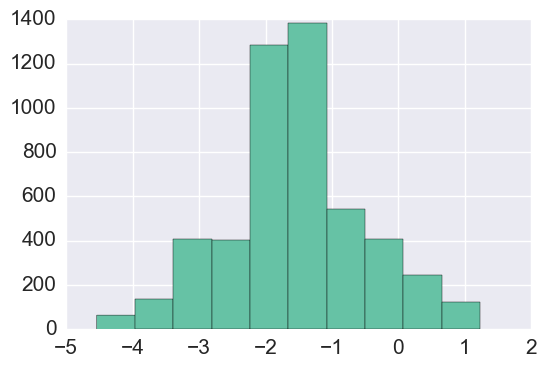

In [271]:
mp.hist(ms)

(array([   26.,   147.,   369.,   515.,  1519.,  1312.,   563.,   327.,
          153.,    69.]),
 array([-1.8199348 , -1.63352331, -1.44711182, -1.26070034, -1.07428885,
        -0.88787736, -0.70146587, -0.51505438, -0.3286429 , -0.14223141,
         0.04418008]),
 <a list of 10 Patch objects>)

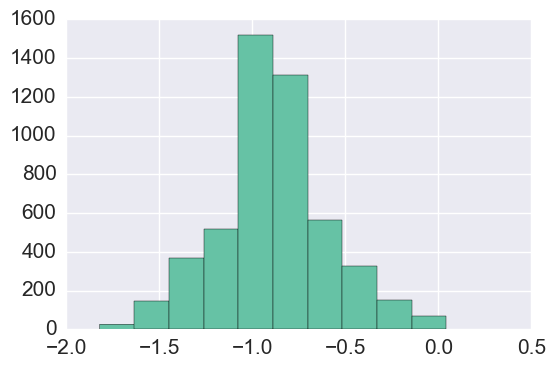

In [272]:
mp.hist(bs)

In [305]:
y = np.array(df.y.values).astype(float)
x = np.array(df.x.values).astype(float)
sig_y = np.array(df.sigma_y.values).astype(float)
A = np.vstack((np.ones(len(x)), x)).T
C = np.diag(sig_y*sig_y)

## These are the initial guesses for the MCMC

bestfit= np.dot(np.linalg.inv(C),y)
bestfit= np.dot(A.T,bestfit)
bestfitvar= np.dot(np.linalg.inv(C),A)
bestfitvar= np.dot(A.T,bestfitvar)
bestfitvar= np.linalg.inv(bestfitvar)
bestfit= np.dot(bestfitvar,bestfit)

np.random.seed(10)
Pbad = 0.5 ## setting Pbad = 0.5 for mixture model
Ybad = np.mean(y)
Vbad = np.mean((y-Ybad)**2)

params = np.array([bestfit[0], bestfit[1], Pbad, Ybad, Vbad])

In [306]:
ndim, nwalkers = 5, 100
pos = [params + 1e-4*np.random.randn(ndim) for i in range(nwalkers)]


In [307]:
sampler = emcee.EnsembleSampler(nwalkers, ndim, ln_posterior, args=(x, y, sig_y))

In [308]:
sampler.run_mcmc(pos, 500);

In [309]:
samples = sampler.chain[:, 50:, :].reshape((-1, ndim))

ValueError: cannot convert float NaN to integer

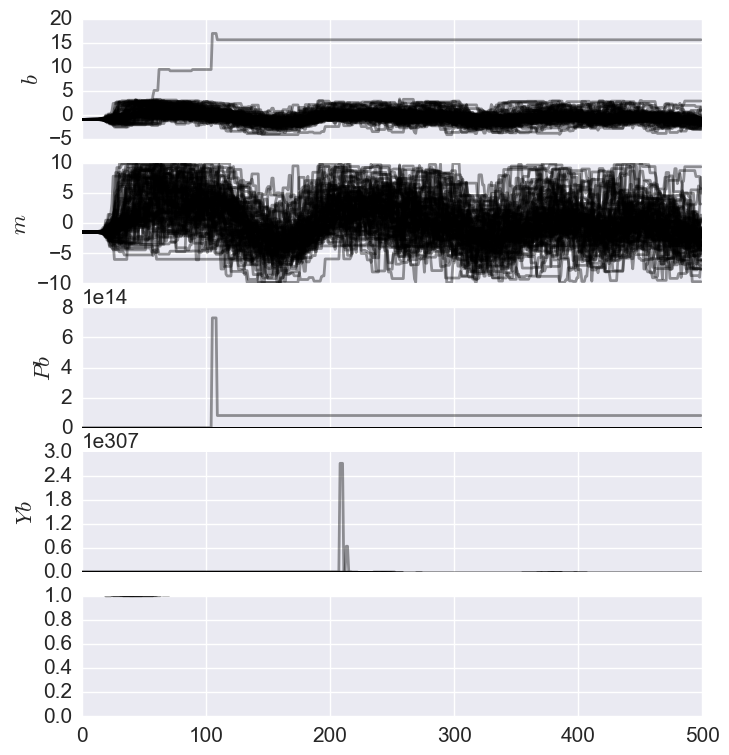

In [310]:
fig, axes = mp.subplots(5, 1, sharex=True, figsize=(8, 9))
axes[0].plot(sampler.chain[:, :, 0].T, color="k", alpha=0.4)
axes[0].yaxis.set_major_locator(MaxNLocator(5))
axes[0].set_ylabel("$b$")

axes[1].plot(sampler.chain[:, :, 1].T, color="k", alpha=0.4)
axes[1].yaxis.set_major_locator(MaxNLocator(5))
axes[1].set_ylabel("$m$")

axes[2].plot(np.exp(sampler.chain[:, :, 2]).T, color="k", alpha=0.4)
axes[2].yaxis.set_major_locator(MaxNLocator(5))
axes[2].set_ylabel("$Pb$")

axes[3].plot(np.exp(sampler.chain[:, :, 3]).T, color="k", alpha=0.4)
axes[3].yaxis.set_major_locator(MaxNLocator(5))
axes[3].set_ylabel("$Yb$")

axes[4].plot(np.exp(sampler.chain[:, :, 4]).T, color="k", alpha=0.4)
axes[4].yaxis.set_major_locator(MaxNLocator(5))
axes[4].set_ylabel("$Vb$")


axes[4].set_xlabel("step number")


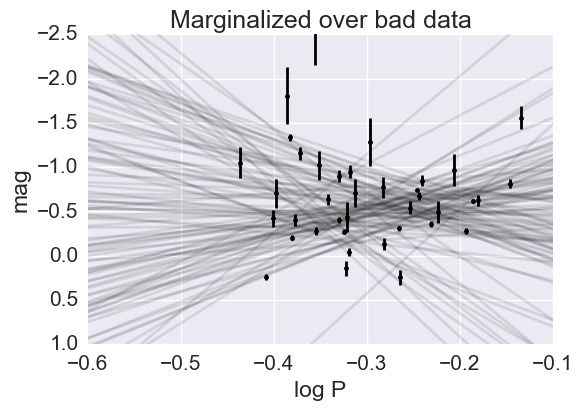

In [312]:
xfit = np.arange(-1, 1, 0.1)


for b, m, Pb, yb, Vb, in samples[np.random.randint(len(samples), size=100)]:
    mp.plot(xfit, m*xfit+b, color="k", alpha=0.1)
#pl.plot(xl, m_true*xl+b_true, color="r", lw=2, alpha=0.8)
mp.errorbar(x, y, yerr=sig_y, fmt=".k")

mp.xlim(-0.6, -0.1)
mp.ylim(1, -2.5)
mp.xlabel('log P')
mp.ylabel('mag')
mp.title('Marginalized over bad data')

#